## 1. Load the dataset

In [1]:
# Numerical libraries
import numpy as np

# to handle data in form of rows and columns 
import pandas as pd

#importing seaborn for statistical plots
import seaborn as sns
sns.set(color_codes=True)

# importing ploting libraries
import matplotlib.pyplot as plt

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#for normalization
from sklearn.preprocessing import StandardScaler

#Import the library for handling the imbalance dataset
from imblearn.over_sampling import SMOTE

#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

# Import Naive Bayes machine learning library
from sklearn.naive_bayes import GaussianNB

#Import the metrics
from sklearn import metrics

In [2]:
# reading the CSV file into pandas dataframe

diabetes_data=pd.read_csv('pima-indians-diabetes-1.csv')

## 2. Overview of data

In [3]:
# Check top few records to get a feel of the data structure

diabetes_data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* It shows that there are eight independent variables (Preg, Plas, Pres, skin, test, mass, pedi, age) and one dependent variable (class).

In [4]:
# Check last few records to get a feel of the data structure

diabetes_data.tail()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# To show the detailed summary 

diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* It shows the number of rows, number of columns, data types information, Memory usage, number of null values in each column.

In [6]:
#Lets analysze the distribution of the dependent column

diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
# To get the shape of the dataset

diabetes_data.shape

(768, 9)

## 3. Handling Missing Values

In [8]:
# To check the missing values in the dataset

diabetes_data.isnull().values.any()

False

* It shows that there are no null values (missing values) in the dataset. But, it does not make sense. It seems very likely that zero values encode missing data.We replace 0 by NaN values to count the missing values.
 

In [9]:
#Replace 0 to NaN

d=diabetes_data[['Plas','Pres','skin','test','mass']]=diabetes_data[['Plas','Pres','skin','test','mass']].replace(0,np.nan)
d.head()


,Plas,Pres,skin,test,mass
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1


In [10]:
# Find the number of Missing values

d.isnull().sum()[['Plas','Pres','skin','test','mass']]

Plas      5
Pres     35
skin    227
test    374
mass     11
dtype: int64

### Handling the Missing values by replacing NaN to median

In [11]:
#Replace NaN to mean value to explore dataset

diabetes_data['Plas'].fillna(diabetes_data['Plas'].median(),inplace=True)
diabetes_data['Pres'].fillna(diabetes_data['Pres'].median(),inplace=True)
diabetes_data['skin'].fillna(diabetes_data['skin'].median(),inplace=True)
diabetes_data['test'].fillna(diabetes_data['test'].median(),inplace=True)
diabetes_data['mass'].fillna(diabetes_data['mass'].median(),inplace=True)

diabetes_data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## 4.Exploratory Data Analysis

In [12]:
# Analysing the class

diabetes_data.groupby('class').size()

class
0    500
1    268
dtype: int64

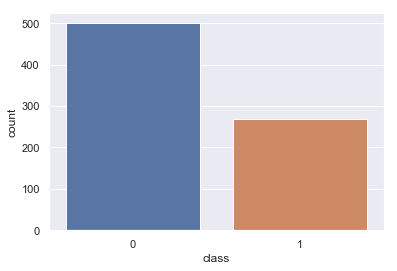

In [13]:
# countplot----Plot the frequency of the class

#It shows the count of observations in each categorical bin using bars

sns.countplot(diabetes_data['class'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A2EF593BA8>,
      dtype=object)

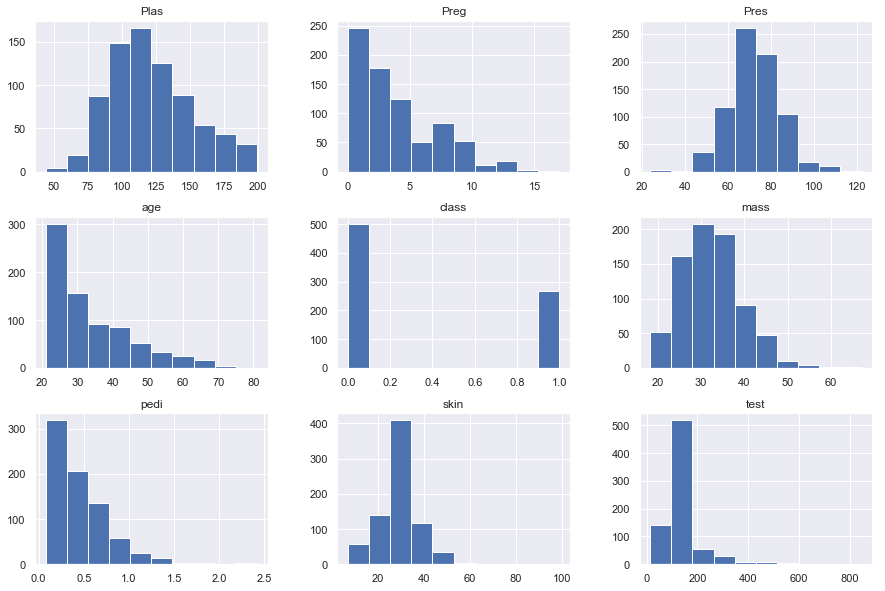

In [14]:
# Histogram 

diabetes_data.hist(figsize=(15,10))

C:\Users\Laxmi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


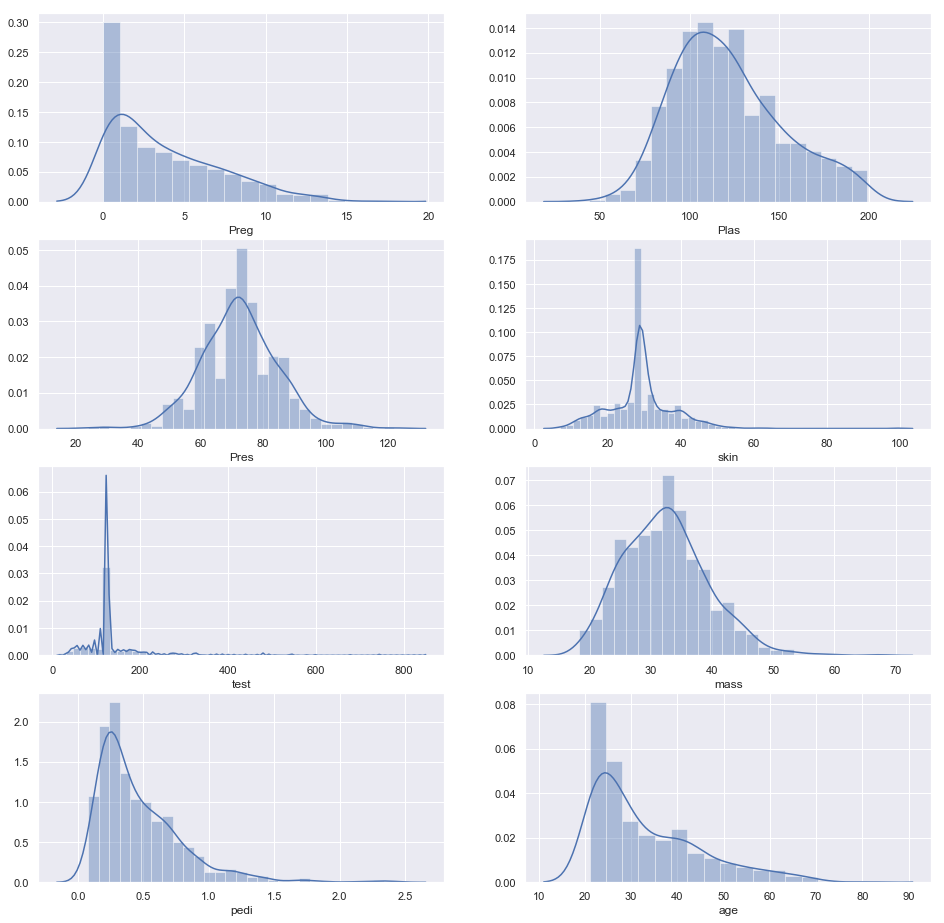

In [15]:
# Distplot

fig, ax2 = plt.subplots(4, 2, figsize=(16, 16))
sns.distplot(diabetes_data['Preg'],ax=ax2[0][0])
sns.distplot(diabetes_data['Plas'],ax=ax2[0][1])
sns.distplot(diabetes_data['Pres'],ax=ax2[1][0])
sns.distplot(diabetes_data['skin'],ax=ax2[1][1])
sns.distplot(diabetes_data['test'],ax=ax2[2][0])
sns.distplot(diabetes_data['mass'],ax=ax2[2][1])
sns.distplot(diabetes_data['pedi'],ax=ax2[3][0])
sns.distplot(diabetes_data['age'],ax=ax2[3][1])


* The plots show that Plas, Pres, mass are normally distributed. Preg, test, age, pedi are rightly skewed.

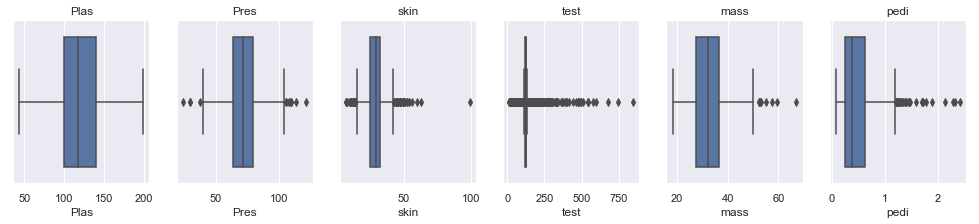

In [16]:
# boxplot

fig=plt.figure(figsize=(20,3))

for i in np.arange(1,7):
    data3=plt.subplot(1,7,i,title=diabetes_data.columns[i])
    sns.boxplot(diabetes_data[diabetes_data.columns[i]])

C:\Users\Laxmi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Laxmi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Laxmi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


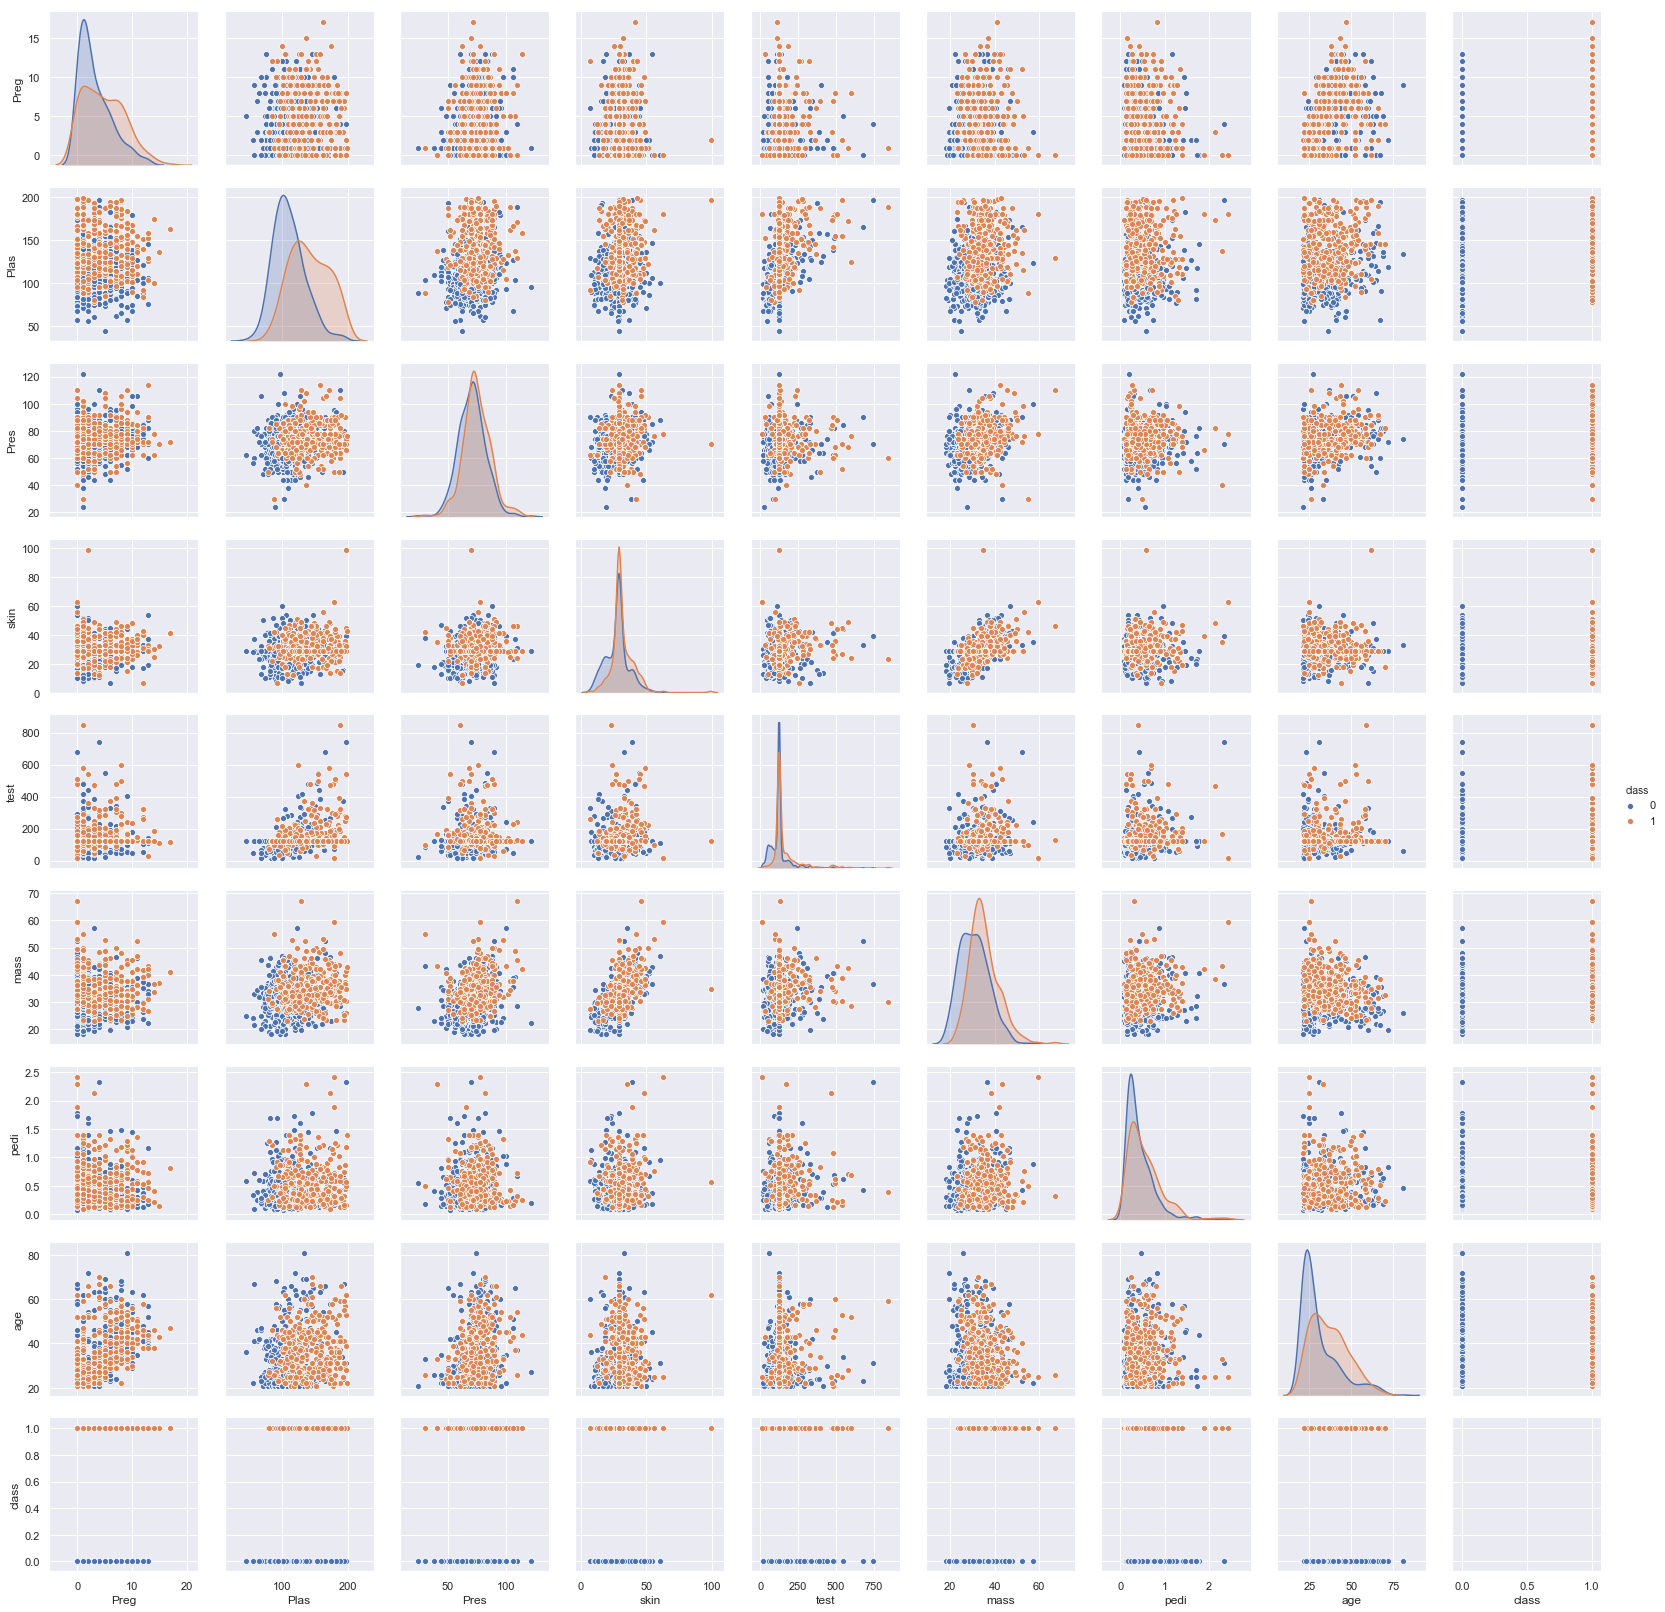

In [17]:
# pairplot--Multiple relationship of scatterplot

sns.pairplot(diabetes_data,hue='class')

The plot shows that there is some relationship between parameters. class is added as hue. We see that blue and orange dots are overlap. 

In [18]:
# corrlation matrix 

cor=diabetes_data.corr()
cor

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Plas,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
Pres,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
skin,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
test,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
mass,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
pedi,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
class,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


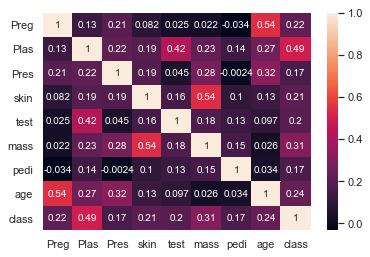

In [19]:
# correlation plot---heatmap

sns.heatmap(cor,annot=True)

### Encoding the age

In [20]:
# Age has dispersion so divide into bucket

def age(df):
    df.loc[(df['age'] > 20) & (df['age'] <= 41), 'age'] = 1
    df.loc[(df['age'] > 42) & (df['age'] <= 61), 'age'] = 2
    df.loc[(df['age'] > 62) & (df['age'] <= 81), 'age'] = 3       
    return df

age(diabetes_data);

## 5. Model Building

### Splitting the dataset

In [21]:
X=diabetes_data.loc[:,diabetes_data.columns!='class']
y=diabetes_data.loc[:,diabetes_data.columns=='class']

In [22]:
# Split X and y into training and test set in 70:30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
columns=X_train.columns

### Normalizing

In [23]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Laxmi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Laxmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Laxmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


###  Managing the imbalance class 

In [24]:
Ov_sampling=SMOTE(random_state=0)

# now use SMOTE to oversample our train data which have features data_train_X and labels in data_train_y
ov_data_X,ov_data_y=Ov_sampling.fit_sample(X_train,y_train)
ov_data_X=pd.DataFrame(data=ov_data_X,columns=columns)
ov_data_y=pd.DataFrame(ov_data_y,columns=['class'])

C:\Users\Laxmi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
print('length of oversampled data is   ',len(ov_data_X))
print('Number of no subscription in oversampled data ' ,len(ov_data_y[ov_data_y['class']==0]))
print('Number of subscription ' ,len(ov_data_y[ov_data_y['class']==1]))
print('Proportion of no subscription data in oversampled data is ' ,len(ov_data_y[ov_data_y['class']==0])/len(ov_data_X))
print('Proportion of subscription data in oversampled data is ' ,len(ov_data_y[ov_data_y['class']==1])/len(ov_data_X))

length of oversampled data is    686
Number of no subscription in oversampled data  343
Number of subscription  343
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [26]:
ov_data_y['class'].value_counts()

1    343
0    343
Name: class, dtype: int64

##  Naive Bayes Model

In [27]:
# invoke the Gaussian function and find the bestfit model on training data
model=GaussianNB()
model.fit(ov_data_X,ov_data_y)
pred = model.predict(X_test)

C:\Users\Laxmi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Evaluate model performance

In [28]:
model_score = model.score(X_test, y_test)
print('Model score :',model_score)
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test,pred))

Model score : 0.7575757575757576
Confusion Matrix:
 [[132  25]
 [ 31  43]]


###  Measure performance of Naive Bayes Classification

In [29]:
print('Accuracy :',metrics.accuracy_score(y_test,pred))
print('Precision :',metrics.precision_score(y_test,pred))
print('Recall :',metrics.recall_score(y_test,pred))
print('F-score :',metrics.f1_score(y_test,pred))

Accuracy : 0.7575757575757576
Precision : 0.6323529411764706
Recall : 0.581081081081081
F-score : 0.6056338028169013


In [30]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       157
           1       0.63      0.58      0.61        74

   micro avg       0.76      0.76      0.76       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



The Accuracy of the Naive Bayes Model is not very much improved because in Naive Bayes we assume that attributes are independent to each other but in real context they are not completely independent to each other.Some relation exists between them. 